In [18]:
# Dependencies
#from config import (census_key, gkey)
import gmaps

import numpy as np
import pandas as pd
import requests
import time

#from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [19]:
#import baby name data
baby_name_original = pd.read_csv(
    "../Data/StateNames.csv", dtype="object", encoding="utf-8")
#display result
baby_name_original.head()

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


In [20]:
#Q2 How many names are used by both genders? More or less over time? More or less prevalent by region? KL
#Child Gender vs Name Percent Match

#The unique names from 1910-2014
totalnamecount= baby_name_original['Name'].nunique()
totalnamecount

30274

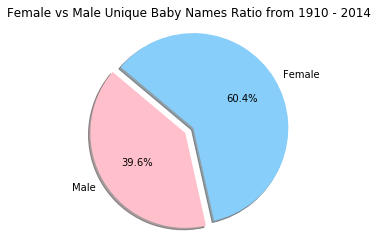

<Figure size 432x288 with 0 Axes>

In [22]:
# The names used by each gender (female has more diverse name selections/options than male)
name= baby_name_original.loc[:,['Name','Gender','Count']]
name

gendername= name.groupby(['Gender']).nunique()['Name']
gendername

Male= 13139
Female=20031

labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [13139, 20031]

# The colors of each section of the pie chart
colors = ["pink","lightskyblue"]

explode = (0,0.1)

plt.pie(sizes, labels=labels,explode=explode, colors=colors, shadow=True, startangle=140,autopct="%1.1f%%")
plt.title(f"Female vs Male Unique Baby Names Ratio from 1910 - 2014")
plt.axis("equal")
plt.show()
# export as png
plt.savefig(f'Output/Female vs Male Unique Baby Names Ratio from 1910 - 2014.png')

In [ ]:
#The progression of numbers of unique names in each year


year= baby_name_original.loc[:,['Name','Year','Gender']]
year

# getting female list of unique name by each year

genderf= year.loc[year['Gender'] == 'F']
genderf

genderfemale= genderf.groupby(['Year','Gender']).nunique()['Name']


genderfemale= pd.DataFrame(genderfemale)
genderfemale

#getting male list of unique name by each year

genderm= year.loc[year['Gender'] == 'M']
genderm

gendermale= genderm.groupby(['Year','Gender']).nunique()['Name']

gendermale= pd.DataFrame(gendermale)
gendermale


final=pd.merge(genderfemale, gendermale, how='outer', on=['Year','Gender','Name'])
final


In [ ]:
final.rename(index={0: "Year", 1: "Gender", 2: "Name"})
df = final.unstack()
df.columns =df.columns.droplevel()
df

multi_plot = df.plot(kind="line", figsize=(15, 10))
multi_plot.set_title("The Unique Counts of Names Progession Over The Century per Gender")
multi_plot.set_xlabel("Year")

multi_plot.set_ylabel("Unique Counts of Names")
multi_plot.legend(ncol=2)


years = list(range(1910, 2021, 10))

#plt.set_xticks(years)
plt.grid()


plt.savefig(f'Output/The Unique Counts of Names Progession Over The Century per Gender.png')


In [ ]:
# The progression of numbers of unique names by state in gender

region= baby_name_original.loc[:,['Name','Year','Gender','State']]
region



f= region.loc[region['Gender'] == 'F']
f

m= region.loc[region['Gender'] == 'M']
m


fgender= f.groupby(['State']).sum()
fgender = pd.DataFrame(fgender)
fgender

mgender=m.groupby(['State']).sum()
mgender= pd.DataFrame(mgender)
mgender

data=pd.merge(fgender, mgender, how='left', on=['State'], suffixes=('_F', '_M'))
data

f= data['Year_F']
m =data['Year_M']


x = data.index
y1 = f
y2= m
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x, y1, s=25, marker="s", label='Female')
ax1.scatter(x, y2, s=25, marker="o", label='Male')


plt.title("Unique Names in Each State")
plt.xlabel("States")
plt.ylabel("Unique Counts of Names")
plt.xticks(rotation=90)

plt.legend(loc='upper right');
plt.show()
plt.savefig(f'Output/The Counts of Unique Name In Different States per Gender.png')

In [ ]:
# Northeast = ('CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA')
# Midwest = ('IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD')
# South = ('DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'AR', 'OK', 'TX')
# West = ('AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA')


# #add column Region and assign based on region-state values
# baby_name_original["Region"] = np.where(baby_name_original["State"].isin(Northeast), "Northeast", 
#          (np.where(baby_name_original["State"].isin(South), "South",
#             (np.where(baby_name_original["State"].isin(West), "West",
#                 (np.where(baby_name_original["State"].isin(Midwest), "Midwest", "Unknown")))))))

# #confirm 4 regions across all data
# #baby_name_original.nunique()
# baby_name_original

# regional= baby_name_original.loc{:,['Name','Year','Gender','Region']}
# regional
# # babyRegion = baby_name_original.groupby("Region")

# # Region = babyRegion.count().index
# # RegionNames = babyRegion['Count'].sum()

# # regionSummary = pd.DataFrame({"Region": Region, "Names": RegionNames,
# #                              })
# # regionSummary.set_index('Region', inplace=True)

# # regionSummary


# # f= region.loc[region['Gender'] == 'F']
# # f

# # m= region.loc[region['Gender'] == 'M']
# # m


# # fgender= f.groupby(['Gender','State']).nunique()['Name']
# # fgender = pd.DataFrame(fgender)


# # mgender=m.groupby(['Gender','State']).nunique()['Name']
# # mgender= pd.DataFrame(mgender)


# # data=pd.merge(fgender, mgender, how='left', on=['State'], suffixes=('_F', '_M'))
# # data.head()